# Market Basket Analysis in Python using Apriori Algorithm

**Market Basket Analysis using assocition rules - apriori technique in Two ways**

Association rules analysis is a technique to uncover how items are associated to each other. 

There are three common ways to measure association.

Measure 1: Support. This says how popular an itemset is, it is number of times appear in total number of transaction. In other word we say frequency of item.
    
Measure 2: Confidence. This says how likely item Y is purchased when item X is purchased, expressed as {X -> Y}. This is measured by the proportion of transactions with item X, in which item Y also appears. 
    
Measure 3: Lift.  it is ratio of expected confidence to observed confidence. it is described as confidence of Y when item X was already known(x/y) to the confidence of Y when X item is unknown. in other words confidence of Y w.r.t. x and confidence of Y without X (means both are independent to each other).

**support = occurance of item / total no of transaction.**

**confidence = support ( X Union Y) / support(X).**

**lift = support (X Union Y)/ support(X) * support(Y) .**    


In [1]:
#External package need to install
!pip install apyori

In [2]:
#import all required packages..
import pandas as pd
import numpy as np
from apyori import apriori

In [3]:
#loading market basket dataset..

df = pd.read_csv('Market_Basket_Optimisation.csv',header=None)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#replacing empty value with 0.
df.fillna(0,inplace=True)

In [6]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,chutney,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,turkey,avocado,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,mineral water,milk,energy bar,whole wheat rice,green tea,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
#for using aprori need to convert data in list format..
# transaction = [['apple','almonds'],['apple'],['banana','apple']]....
transactions = []
for i in range(0,len(df)):
    transactions.append([str(df.values[i,j]) for j in range(0,20) if str(df.values[i,j])!='0'])

In [8]:
transactions[0]

['shrimp',
 'almonds',
 'avocado',
 'vegetables mix',
 'green grapes',
 'whole weat flour',
 'yams',
 'cottage cheese',
 'energy drink',
 'tomato juice',
 'low fat yogurt',
 'green tea',
 'honey',
 'salad',
 'mineral water',
 'salmon',
 'antioxydant juice',
 'frozen smoothie',
 'spinach',
 'olive oil']

In [9]:
#Call apriori function which requires minimum support, confidance and lift, min length is combination of item default is 2".
rules = apriori(transactions,min_support=0.003,min_confidance=0.2,min_lift=3,min_length=2)

In [10]:
#it generates a set of rules in a generator file...
rules

<generator object apriori at 0x0000023D2318EC80>

In [11]:
# all rules need to be converted in a list..
Results = list(rules)
Results

[RelationRecord(items=frozenset({'brownies', 'cottage cheese'}), support=0.0034662045060658577, ordered_statistics=[OrderedStatistic(items_base=frozenset({'brownies'}), items_add=frozenset({'cottage cheese'}), confidence=0.10276679841897232, lift=3.225329518580382), OrderedStatistic(items_base=frozenset({'cottage cheese'}), items_add=frozenset({'brownies'}), confidence=0.10878661087866107, lift=3.2253295185803816)]),
 RelationRecord(items=frozenset({'light cream', 'chicken'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'chicken'}), items_add=frozenset({'light cream'}), confidence=0.07555555555555556, lift=4.843950617283951), OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)]),
 RelationRecord(items=frozenset({'escalope', 'mushroom cream sauce'}), support=0.005732568990801226, ordered_statistics=[OrderedStatistic(items_base=frozenset({'escalope'}),

In [12]:
#convert result in a dataframe for further operation...
df_results = pd.DataFrame(Results)

In [13]:
# as we see order statistics itself a list so need to be converted in proper format..
df_results.head()

,items,support,ordered_statistics
0,"(brownies, cottage cheese)",0.003466,"[((brownies), (cottage cheese), 0.102766798418..."
1,"(light cream, chicken)",0.004533,"[((chicken), (light cream), 0.0755555555555555..."
2,"(escalope, mushroom cream sauce)",0.005733,"[((escalope), (mushroom cream sauce), 0.072268..."
3,"(escalope, pasta)",0.005866,"[((escalope), (pasta), 0.07394957983193277, 4...."
4,"(tomato juice, fresh bread)",0.004266,"[((fresh bread), (tomato juice), 0.09907120743..."


In [14]:
#keep support in a separate data frame so we can use later.. 
support = df_results.support

In [15]:
'''
convert orderstatistic in a proper format.
order statistic has lhs => rhs as well rhs => lhs 
we can choose any one for convience i choose first one which is 'df_results['ordered_statistics'][i][0]'
''' 

#all four empty list which will contain lhs, rhs, confidance and lift respectively.

first_values = []
second_values = []
third_values = []
fourth_value = []

# loop number of rows time and append 1 by 1 value in a separate list.. first and second element was frozenset which need to be converted in list..
for i in range(df_results.shape[0]):
    single_list = df_results['ordered_statistics'][i][0]
    first_values.append(list(single_list[0]))
    second_values.append(list(single_list[1]))
    third_values.append(single_list[2])
    fourth_value.append(single_list[3])

In [16]:
#convert all four list into dataframe for further operation..
lhs = pd.DataFrame(first_values)
rhs= pd.DataFrame(second_values)
confidance=pd.DataFrame(third_values,columns=['Confidence'])
lift=pd.DataFrame(fourth_value,columns=['lift'])

In [17]:
#concat all list together in a single dataframe
df_final = pd.concat([lhs,rhs,support,confidance,lift], axis=1)
df_final

,0,1,0,1,2,support,Confidence,lift
0,brownies,None,cottage cheese,None,None,0.003466,0.102767,3.225330
1,chicken,None,light cream,None,None,0.004533,0.075556,4.843951
2,escalope,None,mushroom cream sauce,None,None,0.005733,0.072269,3.790833
3,escalope,None,pasta,None,None,0.005866,0.073950,4.700812
4,fresh bread,None,tomato juice,None,None,0.004266,0.099071,3.259356
...,...,...,...,...,...,...,...,...
89,pancakes,ground beef,mineral water,spaghetti,None,0.003066,0.211009,3.532991
90,ground beef,None,mineral water,spaghetti,tomatoes,0.003066,0.031208,3.344117
91,olive oil,None,milk,mineral water,spaghetti,0.003333,0.050607,3.216994
92,milk,mineral water,spaghetti,shrimp,None,0.003066,0.063889,3.014029


In [18]:
'''
 we have some of place only 1 item in lhs and some place 3 or more so we need to a proper represenation for User to understand. 
 removing none with ' ' extra so when we combine three column in 1 then only 1 item will be there with spaces
 which is proper rather than none.
 example : coffee,none,none which converted to coffee, ,
'''
df_final.fillna(value=' ', inplace=True)

In [19]:
df_final.columns = ['lhs', 1, 2, 'rhs', 'support', 'confidence', 'lift', 'new_column']


In [20]:
#add all three column because those where the lhs itemset only
df_final['lhs'] = df_final['lhs']+str(", ")+df_final[1]+str(", ")+df_final[2]

In [21]:
#drop those 1,2 column because now we already appended to lhs column..
df_final.drop(columns=[1,2],inplace=True)

In [22]:
#this is final output.. you can sort based on the support lift and confidance..
df_final.head()

,lhs,rhs,support,confidence,lift,new_column
0,"brownies, , cottage cheese",,,0.003466,0.102767,3.225330
1,"chicken, , light cream",,,0.004533,0.075556,4.843951
2,"escalope, , mushroom cream sauce",,,0.005733,0.072269,3.790833
3,"escalope, , pasta",,,0.005866,0.073950,4.700812
4,"fresh bread, , tomato juice",,,0.004266,0.099071,3.259356


# Other way of doing Apriori in Python.


 mlxtend used two way based approach which generate frequent itemset and association rules over that.
 
 mlxtend are proper and has community support.

In [23]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

df1 = pd.read_csv('data.csv', encoding="ISO-8859-1")
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [24]:
# data has many country choose any one for check..
df1.Country.value_counts().head(5)

United Kingdom    495478
Germany             9495
France              8557
EIRE                8196
Spain               2533
Name: Country, dtype: int64

In [25]:
#using only France country data for now can check for other as well..
df1 = df1[df1.Country == 'France']

In [26]:
# some spaces are there in description need to remove else later operation it will create problem..
df1['Description'] = df1['Description'].str.strip()

In [27]:
#some of transaction quantity is negative which can not be possible remove that.
df1 = df1[df1.Quantity >0]

In [28]:
df1[df1.Country == 'France'].head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/2010 8:45,3.75,12583.0,France
27,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/2010 8:45,3.75,12583.0,France
28,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/2010 8:45,3.75,12583.0,France
29,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/2010 8:45,0.85,12583.0,France
30,536370,21883,STARS GIFT TAPE,24,12/1/2010 8:45,0.65,12583.0,France
31,536370,10002,INFLATABLE POLITICAL GLOBE,48,12/1/2010 8:45,0.85,12583.0,France
32,536370,21791,VINTAGE HEADS AND TAILS CARD GAME,24,12/1/2010 8:45,1.25,12583.0,France
33,536370,21035,SET/2 RED RETROSPOT TEA TOWELS,18,12/1/2010 8:45,2.95,12583.0,France
34,536370,22326,ROUND SNACK BOXES SET OF4 WOODLAND,24,12/1/2010 8:45,2.95,12583.0,France
35,536370,22629,SPACEBOY LUNCH BOX,24,12/1/2010 8:45,1.95,12583.0,France


In [29]:
#convert data in format which it require converting using pivot table and Quantity sum as values. fill 0 if any nan values

basket = pd.pivot_table(data=df1,index='InvoiceNo',columns='Description',values='Quantity', \
                        aggfunc='sum',fill_value=0)

In [30]:
basket.head()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536852,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536974,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537065,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537463,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
#this to check correctness after binning it to 1 at below code..
basket['ALARM CLOCK BAKELIKE RED'].head(10)

InvoiceNo
536370    24
536852     0
536974     0
537065     4
537463     0
537468     0
537693     0
537897     0
537967     0
538008     0
Name: ALARM CLOCK BAKELIKE RED, dtype: int64

In [32]:
# we dont need quantity sum we need either has taken or not so if user has taken that item mark as 1 else he has not taken 0.

def convert_into_binary(x):
    if x > 0:
        return 1
    else:
        return 0

In [33]:
basket_sets = basket.applymap(convert_into_binary)

In [34]:
# above steps we can same item has quantity now converted to 1 or 0.
basket_sets['ALARM CLOCK BAKELIKE RED'].head()

InvoiceNo
536370    1
536852    0
536974    0
537065    1
537463    0
Name: ALARM CLOCK BAKELIKE RED, dtype: int64

In [35]:
#remove postage item as it is just a seal which almost all transaction contain. 
basket_sets.drop(columns=['POSTAGE'],inplace=True)

In [36]:
#call apriori function and pass minimum support here we are passing 7%. means 7 times in total number of transaction that item was present.
frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)

C:\Users\KAVYA\conda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [37]:
#it will generate frequent itemsets using two step approch
frequent_itemsets

,support,itemsets
0,0.071429,(4 TRADITIONAL SPINNING TOPS)
1,0.096939,(ALARM CLOCK BAKELIKE GREEN)
2,0.102041,(ALARM CLOCK BAKELIKE PINK)
3,0.094388,(ALARM CLOCK BAKELIKE RED)
4,0.081633,(BAKING SET 9 PIECE RETROSPOT)
5,0.071429,(CHILDRENS CUTLERY DOLLY GIRL)
6,0.099490,(DOLLY GIRL LUNCH BOX)
7,0.096939,(JUMBO BAG RED RETROSPOT)
8,0.076531,(JUMBO BAG WOODLAND ANIMALS)
9,0.125000,(LUNCH BAG APPLE DESIGN)


In [38]:
# we have association rules which need to put on frequent itemset. here we are setting based on lift and has minimum lift as 1
rules_mlxtend = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules_mlxtend.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE GREEN),0.102041,0.096939,0.073980,0.725000,7.478947,0.064088,3.283859
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE PINK),0.096939,0.102041,0.073980,0.763158,7.478947,0.064088,3.791383
2,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.094388,0.096939,0.079082,0.837838,8.642959,0.069932,5.568878
3,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.096939,0.094388,0.079082,0.815789,8.642959,0.069932,4.916181
4,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE PINK),0.094388,0.102041,0.073980,0.783784,7.681081,0.064348,4.153061


In [39]:
# rules_mlxtend.rename(columns={'antecedents':'lhs','consequents':'rhs'})

# as based business use case we can sort based on confidance and lift.
rules_mlxtend[ (rules_mlxtend['lift'] >= 4) & (rules_mlxtend['confidence'] >= 0.8) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.094388,0.096939,0.079082,0.837838,8.642959,0.069932,5.568878
3,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.096939,0.094388,0.079082,0.815789,8.642959,0.069932,4.916181
17,(SET/6 RED SPOTTY PAPER PLATES),(SET/20 RED RETROSPOT PAPER NAPKINS),0.127551,0.132653,0.102041,0.800000,6.030769,0.085121,4.336735
18,(SET/6 RED SPOTTY PAPER CUPS),(SET/6 RED SPOTTY PAPER PLATES),0.137755,0.127551,0.122449,0.888889,6.968889,0.104878,7.852041
19,(SET/6 RED SPOTTY PAPER PLATES),(SET/6 RED SPOTTY PAPER CUPS),0.127551,0.137755,0.122449,0.960000,6.968889,0.104878,21.556122
20,"(SET/6 RED SPOTTY PAPER CUPS, SET/20 RED RETRO...",(SET/6 RED SPOTTY PAPER PLATES),0.102041,0.127551,0.099490,0.975000,7.644000,0.086474,34.897959
21,"(SET/6 RED SPOTTY PAPER CUPS, SET/6 RED SPOTTY...",(SET/20 RED RETROSPOT PAPER NAPKINS),0.122449,0.132653,0.099490,0.812500,6.125000,0.083247,4.625850
22,"(SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...",(SET/6 RED SPOTTY PAPER CUPS),0.102041,0.137755,0.099490,0.975000,7.077778,0.085433,34.489796


Directed graph below is built for this rule and shown below. it will have always incoming and outcoming edges. Incoming edge(s) will represent antecedants and the stub (arrow) will be next to node.

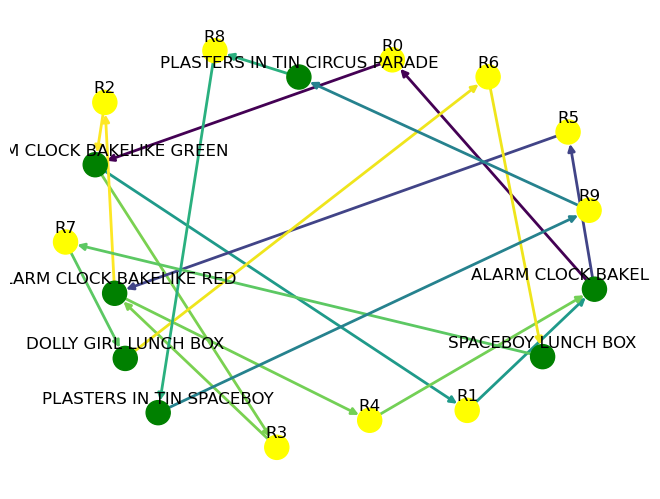

In [40]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

def draw_graph(rules, rules_to_show):
    G1 = nx.DiGraph()
    color_map = []
    N = 50
    colors = np.random.rand(N)
    strs = ['R0', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11']

    for i in range(rules_to_show):
        G1.add_nodes_from(["R" + str(i)])
        for a in rules.iloc[i]['antecedents']:
            G1.add_nodes_from([a])
            G1.add_edge(a, "R" + str(i), color=colors[i], weight=2)
        for c in rules.iloc[i]['consequents']:
            G1.add_nodes_from([c])
            G1.add_edge("R" + str(i), c, color=colors[i], weight=2)

    for node in G1:
        found_a_string = False
        for item in strs:
            if node == item:
                found_a_string = True
        if found_a_string:
            color_map.append('yellow')
        else:
            color_map.append('green')

    edges = G1.edges()
    colors = [G1[u][v]['color'] for u, v in edges]
    weights = [G1[u][v]['weight'] for u, v in edges]

    pos = nx.spring_layout(G1, k=16, scale=1)
    nx.draw(G1, pos, node_color=color_map, edge_color=colors, width=weights, font_size=16,
            with_labels=False)

    for p in pos:  # raise text positions
        pos[p][1] += 0.07
    nx.draw_networkx_labels(G1, pos)
    plt.show()

draw_graph(rules_mlxtend, 10)
